In [ ]:
 import pandas as pd
 import numpy as np
 import scipy.stats as stats
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score
 from sklearn.model_selection import cross_val_score
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.preprocessing import FunctionTransformer
 from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv('/content/archive (14).zip',usecols =['Age','Fare','Survived'])


In [ ]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace= True)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [ ]:
df.isnull().sum()

Survived    0
Age         0
Fare        1
dtype: int64

In [ ]:

df['Fare'].fillna(df['Fare'].median(),inplace=True)
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
X = df.iloc[:,[1,2]]

In [ ]:
y = df.iloc[:,0]

In [ ]:
X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<ipython-input-56-80b2278ad299>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


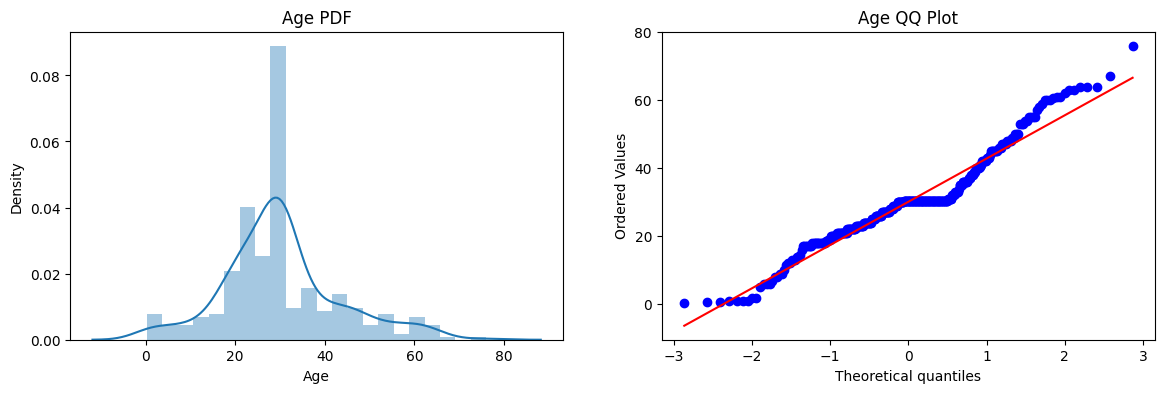

In [ ]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-57-156fc74b624f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


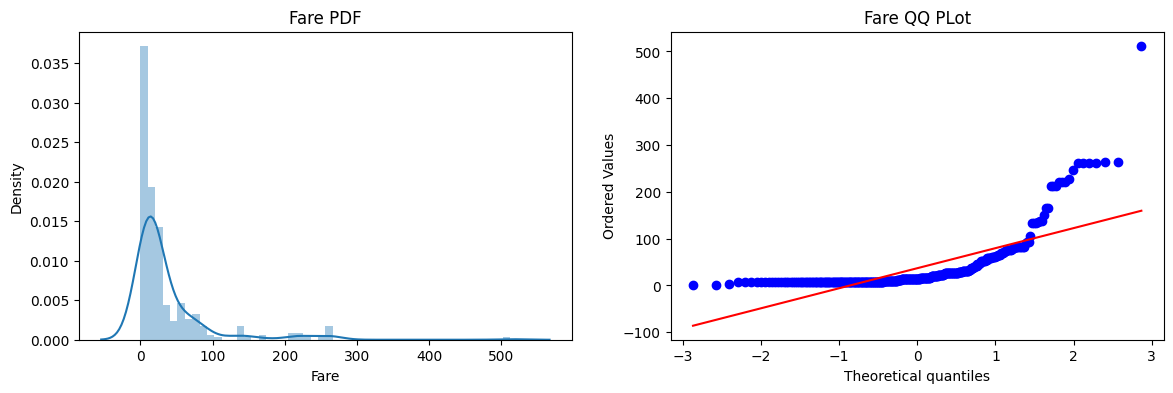

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(X_train['Fare'],dist ="norm",plot=plt)
plt.title('Fare QQ PLot')
plt.show()


In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred2= clf2.predict(X_test)
print('Accuracy LR',accuracy_score(y_test,y_pred))
print("Accuracy DT ",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6071428571428571
Accuracy DT  0.6071428571428571


In [ ]:
trf = FunctionTransformer(func = np.log1p)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [ ]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
print("Accuracy LR ",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR  0.6190476190476191
Accuracy DT 0.5714285714285714


In [ ]:
X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring = 'accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring = 'accuracy',cv=10)))

LR 0.6532520325203252
DT 0.6026713124274099


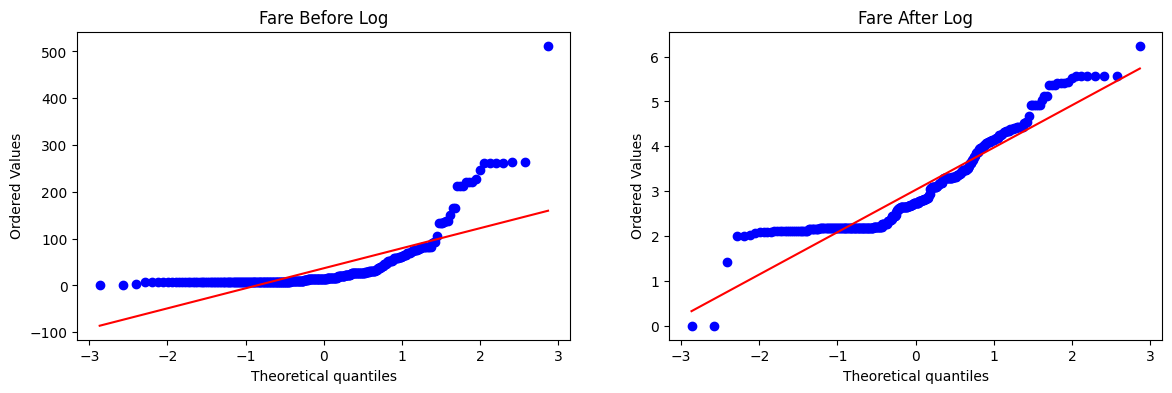

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist ="norm",plot=plt)
plt.title('Fare Before Log')
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist ="norm",plot=plt)
plt.title("Fare After Log")
plt.show()

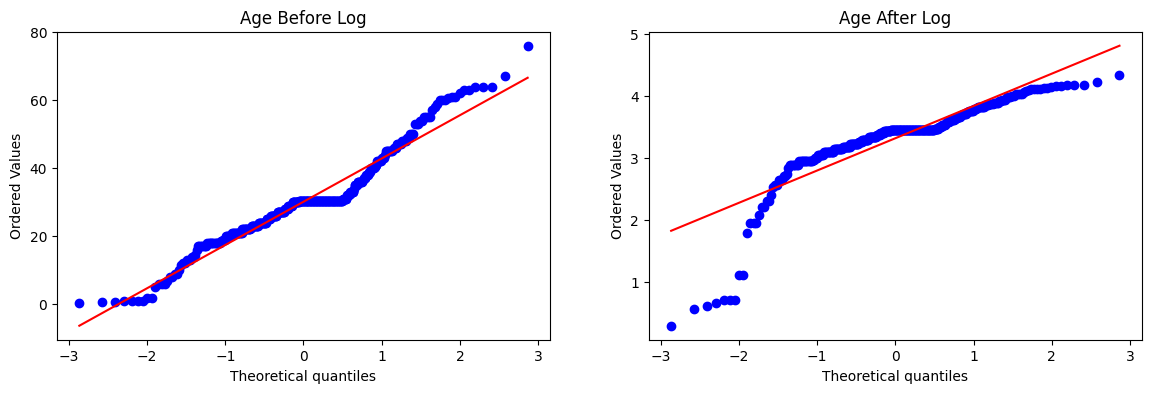

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist ="norm",plot=plt)
plt.title('Age Before Log')
plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist ="norm",plot=plt)
plt.title("Age After Log")
plt.show()

In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))


Accuracy LR 0.6190476190476191
Accuracy DT 0.5714285714285714


In [ ]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))


LR 0.6507549361207897
DT 0.5883855981416957


In [ ]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6483739837398372


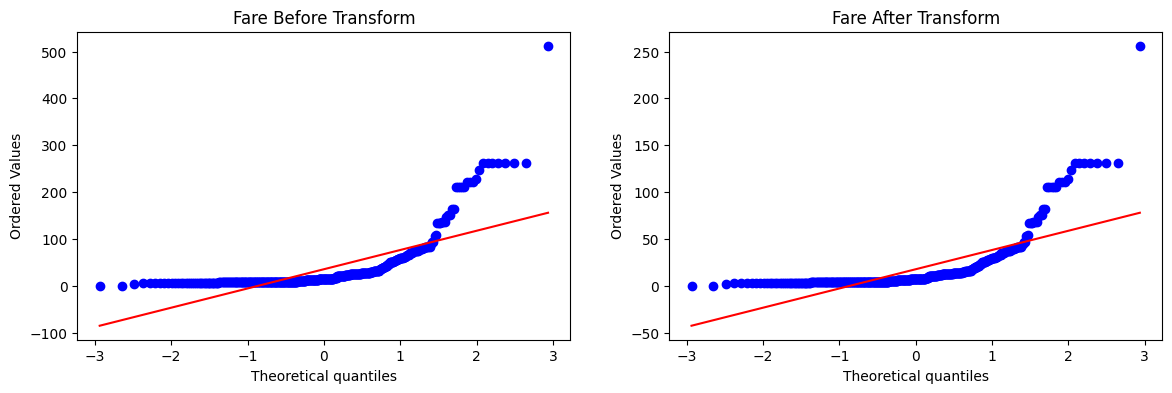

In [ ]:
apply_transform(lambda x:x**1/2)
